In [1]:
import tensorflow as tf
from Load_Data import load_image_dataset_from_directory

# filepaths
b_dir = '/datasets/small_datasets/coffee'
#b_dir = '/datasets/rock_paper_scissor_original'
tr_dir = '/train'
val_dir = '/train'
ts_dir = '/test'

# loading data
train_dataset, valid_dataset, test_dataset = load_image_dataset_from_directory(b_dir, tr_dir, val_dir, ts_dir)

c:\Users\Programming\anaconda3\envs\c_project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 450 files belonging to 9 classes.
Using 360 files for training.
Found 450 files belonging to 9 classes.
Using 90 files for validation.
Found 450 files belonging to 9 classes.


In [2]:
class_names = train_dataset.class_names
print(class_names)

['바리스타룰스 로 슈거 에스프레소 라떼', '바리스타룰스 모카프레소', '바리스타룰스 쇼콜라모카', '바리스타룰스 에스프레소 라떼', '바리스타룰스 카라멜 딥 프레소', '스타벅스 스키니라떼', '스페셜티카페라떼 마일드', '카페라떼 마일드', '티오피 마일드']


c:\Users\Programming\anaconda3\envs\c_project\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


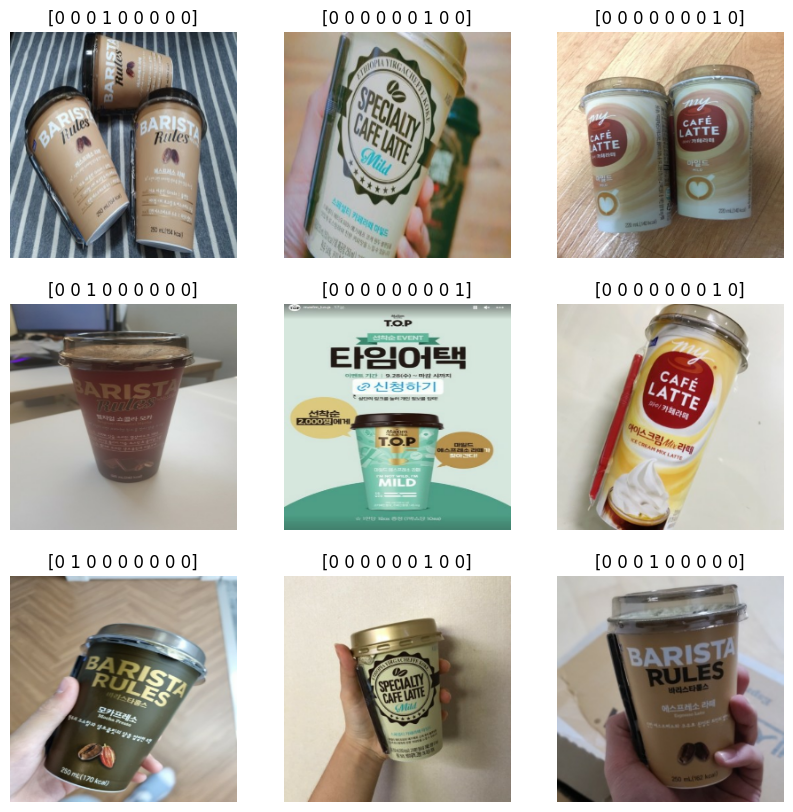

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().astype("uint8"))
        plt.axis("off")

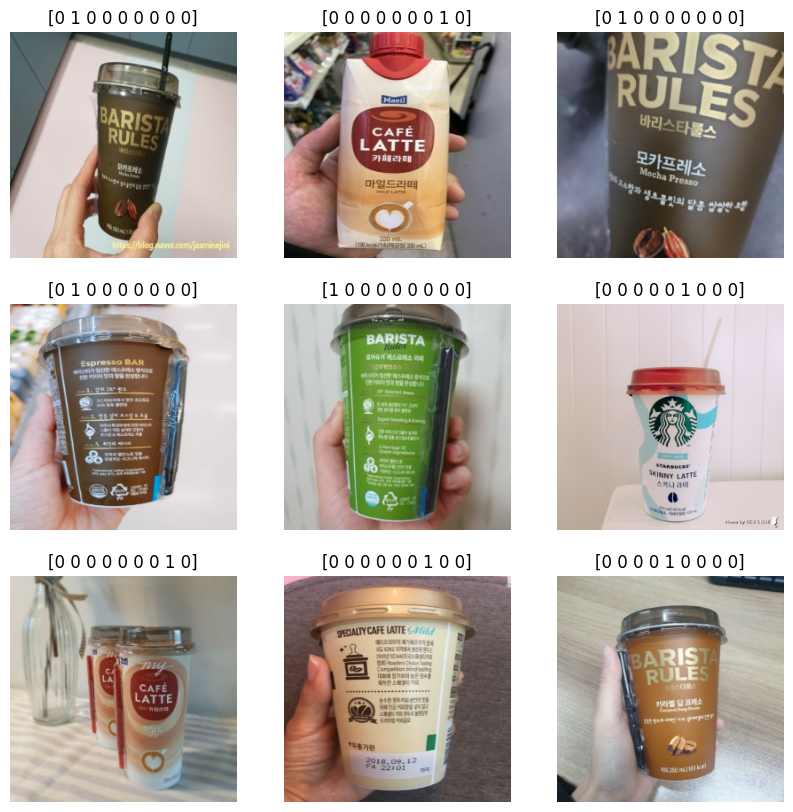

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().astype("uint8"))
        plt.axis("off")

+ Labelling 시 알아두면 좋은 서비스: (https://medium.com/musinsa-tech/imagelabeling-c351c0258a62)

In [5]:
import tensorflow as tf
from Load_Data import load_image_dataset_from_directory, load_image_batch_size_one

# filepaths
b_dir = '/datasets/small_datasets/coffee'
tr_dir = '/train'
ts_dir = '/test'

# loading data
label_names=['바리스타룰스 쇼콜라모카', '바리스타룰스 에스프레소 라떼', '티오피 마일드',
             '바리스타룰스 모카프레소', '바리스타룰스 카라멜 딥 프레소', '스타벅스 스키니라떼',
             '카페라떼 마일드', '스페셜티카페라떼 마일드', '바리스타룰스 로 슈거 에스프레소 라떼']
training_dataset = load_image_batch_size_one(b_dir, tr_dir, label_names=label_names)
validation_size = int(0.2*len(training_dataset))
train_dataset = training_dataset[:-validation_size]
valid_dataset = training_dataset[-validation_size:]
test_dataset = load_image_batch_size_one(b_dir, ts_dir, label_names=label_names)

In [17]:
import matplotlib.pyplot as plt

# 훈련 데이터셋의 최대/최소 이미지 크기
sizes_of_image = []
for i in range(len(train_dataset)):
    img = train_dataset[i][0]
    height=len(img)
    width=len(img[0])
    sizes_of_image.append([height, width])

max_size, min_size = 0, 0
max_index, min_index= -1, -1    # arbitrary initial numbers

for i in range(len(train_dataset)):
    size_of_ith_img = sizes_of_image[i][0]*sizes_of_image[i][1]
    if size_of_ith_img > max_size:
        max_size = size_of_ith_img
        max_index = i
    elif size_of_ith_img < min_size:
        min_size = size_of_ith_img
        min_index = i
print(f"max image size: {sizes_of_image[max_index]}")
print(f"min image size: {sizes_of_image[min_index]}")

max image size: [600, 340]
min image size: [453, 340]
